# Energy and time Predictions for the kinarm reaching model (using manual grid refinement)

In the following code we create a kinarm model and perform optimizations to find the trajectories and movement times for reaches of different distances, and different valuations of time.

if you set 'theGeneratePlots=1', you will get 6 plots per optimization.


In [22]:
#%% Loop across distances and valuations to generate double-pendulum distance/time predictions. 
import ReachingModels as reaching
import numpy as np
import matplotlib.pyplot as plt
import colour as clr
%config InlineBackend.figure_formats = ['svg']
import sys
sys.path.insert(0,'parameterFiles')

# model that has equations to compute endpoint jacobians, equations of motion, and energy. 
sim = reaching.Kinarm()
#sim = reaching.PointMass()

# starting x and y
x = 0.0
ys = 0.20
xystart = np.array([x,ys])

loopValuation = [100, 50, 20, 7, 5, 3, 1, .75, .5, .25]
loopdist = np.array([.005, .01, .025, .05, .075, .1, .2, .25, .3, .35, .4, .45, .5])
loopdist = np.array([.005,.01, .05, 0.1, 0.2, 0.3, 0.4, 0.5])

color1 = clr.Color("#e0f3db")
distcolors = list(color1.range_to(clr.Color("#084081"),len(loopValuation)))

### storing the main results: durations, speeds, costs.
M = len(loopValuation)
N = len(loopdist)
duration      = np.zeros([M, N])
J             = np.zeros([M, N])
costFR        = np.zeros([M, N])
costWork      = np.zeros([M, N])
costTime      = np.zeros([M, N])
peakhandspeed = np.zeros([M, N])
solved        = np.zeros([M, N])
distances     = np.zeros([M, N])
nDist         = 0 #counters
mVal          = 0 #counters

### store returned trajectories
# store trajectories
trajAll       = list() #ultimately the 2D matrix storage
trajFixedDist = list() # fixedDist get reset each inner loop
# store returned Opti variables
optiAll       = list() # ultimately the 2D matrix storage 
optiFixedDist = list() # fixedDist get reset each inner loop

### setup the optimization. 
optiLow = sim.movementTimeOptSetup(
  theTimeValuation  = 1.0,
  theN              = 20,
  theFRCoef         = 0.085)

optiHigh = sim.movementTimeOptSetup(
  theTimeValuation  = 1.0,
  theN              = 40,
  theFRCoef         = 0.085)

optiHigher = sim.movementTimeOptSetup(
  theTimeValuation  = 1.0,
  theN              = 60,
  theFRCoef         = 0.085)


### solve the opt once, we can then always use optiOrig as initial guess. 
trajOrig, optiOrig = sim.updateGuessAndSolve(
  optiLow, 
  xystart, 
  xystart + np.array([x,.10]),
  theDurationGuess    = 1,
  theTimeValuation    = 1,
  theGeneratePlots    = 0)

### initial guess at the solution trajectory
dGuess = trajOrig.duration
prevSol = []
### perform the loop across distances and valuations. 
### the return matrix

for i in loopdist:  
  for j in loopValuation:
    trajLowResult, optiReturn = sim.updateGuessAndSolve(
      optiLow, 
      xystart, 
      xystart + np.array([x,i]), 
      theDurationGuess  = dGuess,
      theTimeValuation    = j,
      theGeneratePlots    = 0)
    
    # if we found a solution:
    if trajLowResult.solved:
      trajResult, optiHigh      = sim.interpolateGuessAndSolve(
      optiReturn, optiHigh,
      theGeneratePlots = False)

      # unpack the results
      duration[mVal,nDist]      = trajResult.duration
      J[mVal,nDist]             = trajResult.costJ
      costFR[mVal,nDist]        = trajResult.costFR
      costWork[mVal,nDist]      = trajResult.costWork
      costTime[mVal,nDist]      = trajResult.costTime
      peakhandspeed[mVal,nDist] = trajResult.peakhandspeed
      solved[mVal,nDist]        = trajResult.solved
      distances[mVal,nDist]     = i
      # update the optiPrev, only if solved == true.
      #optiPrev  = optiReturn
      dGuess    = trajResult.duration
    
    #increment inner
    mVal += 1
    trajFixedDist.append(trajResult)
    optiFixedDist.append(optiReturn)

  
  #reset col counter; increase nDist
  mVal = 0
  nDist += 1
  trajAll.append(trajFixedDist)
  optiAll.append(optiFixedDist)
  
  optiLow = optiOrig
  trajFixedDist = []
  optiFixedDist = []
# %%


This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     1148
Number of nonzeros in inequality constraint Jacobian.:      484
Number of nonzeros in Lagrangian Hessian.............:      518

Total number of variables............................:      379
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      228
Total number of inequality constraints...............:      275
        inequality constraints with only lower bounds:      106
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      169

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

/Users/jeremy/opt/anaconda3/envs/py39/lib/python3.9/site-packages/scipy/interpolate/_fitpack_impl.py:509: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))
/Users/jeremy/opt/anaconda3/envs/py39/lib/python3.9/site-packages/scipy/interpolate/_fitpack_impl.py:509: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))


This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     2268
Number of nonzeros in inequality constraint Jacobian.:      944
Number of nonzeros in Lagrangian Hessian.............:     1018

Total number of variables............................:      739
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      428
Total number of inequality constraints...............:      535
        inequality constraints with only lower bounds:      206
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      329

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

/Users/jeremy/opt/anaconda3/envs/py39/lib/python3.9/site-packages/scipy/interpolate/_fitpack_impl.py:509: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))


   3  1.0372811e+02 3.17e-03 1.10e+09  -1.0 1.10e-05  14.0 1.00e+00 1.00e+00h  1
   4  1.0372811e+02 3.17e-03 1.22e+09  -1.0 3.66e-05  13.5 1.00e+00 1.00e+00h  1
   5  1.0372811e+02 3.17e-03 1.76e+09  -1.0 1.59e-04  13.0 1.00e+00 1.00e+00h  1
   6  1.0372812e+02 7.13e-03 2.57e+10  -1.0 6.93e-03  12.6 1.00e+00 1.00e+00h  1
   7  1.0372812e+02 1.11e-02 3.97e+10  -1.0 4.01e-03  13.0 1.00e+00 1.00e+00h  1
   8  1.0372812e+02 1.29e-02 4.57e+10  -1.0 1.74e-03  13.4 1.00e+00 1.00e+00h  1
   9  1.0372812e+02 2.15e-02 7.60e+10  -1.0 8.64e-03  12.9 1.00e+00 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.0372813e+02 2.53e-02 8.94e+10  -1.0 3.82e-03  13.4 1.00e+00 1.00e+00h  1
  11  1.0372813e+02 4.64e-02 1.65e+11  -1.0 2.10e-02  12.9 1.00e+00 1.00e+00h  1
  12  1.0372813e+02 5.60e-02 2.01e+11  -1.0 9.64e-03  13.3 1.00e+00 1.00e+00h  1
  13  1.0372814e+02 1.21e-01 4.67e+11  -1.0 6.46e-02  12.8 1.00e+00 1.00e+00h  1
  14  1.0372814e+02 1.55e-01

/Users/jeremy/opt/anaconda3/envs/py39/lib/python3.9/site-packages/scipy/interpolate/_fitpack_impl.py:509: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))


   6  1.8556678e+02 5.17e-02 8.62e+02  -1.0 8.86e+00    -  2.43e-01 6.79e-01h  1
   7  1.9704827e+02 1.31e-02 3.40e+02  -1.0 5.44e+00    -  8.67e-01 1.00e+00f  1
   8  2.0541658e+02 9.68e-03 6.90e-01  -1.0 6.78e+00    -  1.00e+00 1.00e+00h  1
   9  1.6259210e+02 7.96e-03 6.29e+00  -2.5 4.61e+00    -  9.43e-01 8.62e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.6224680e+02 5.90e-03 2.51e+01  -2.5 1.24e+01    -  7.27e-01 1.00e+00h  1
  11  1.6232904e+02 4.56e-05 1.61e-03  -2.5 2.31e+01    -  1.00e+00 1.00e+00h  1
  12  1.6125742e+02 1.96e-04 1.64e+00  -3.8 6.29e+00    -  5.71e-01 8.94e-01f  1
  13  1.6112800e+02 3.07e-05 1.14e+00  -3.8 8.87e+00    -  8.28e-01 9.92e-01f  1
  14  1.6112620e+02 3.27e-07 2.42e+00  -3.8 4.85e+00    -  6.19e-01 1.00e+00f  1
  15  1.6112630e+02 8.22e-09 1.64e-07  -3.8 2.34e-01    -  1.00e+00 1.00e+00h  1
  16  1.6107173e+02 4.17e-06 1.52e+00  -5.7 2.49e+00    -  7.80e-01 8.37e-01f  1
  17  1.6106354e+02 9.42e-07

/Users/jeremy/opt/anaconda3/envs/py39/lib/python3.9/site-packages/scipy/interpolate/_fitpack_impl.py:509: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))


This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     2268
Number of nonzeros in inequality constraint Jacobian.:      944
Number of nonzeros in Lagrangian Hessian.............:     1018

Total number of variables............................:      739
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      428
Total number of inequality constraints...............:      535
        inequality constraints with only lower bounds:      206
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      329

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

/Users/jeremy/opt/anaconda3/envs/py39/lib/python3.9/site-packages/scipy/interpolate/_fitpack_impl.py:509: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))


iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0000000e+01 1.18e+04 2.00e+01  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  1.0100327e+01 1.17e+04 1.82e+01  -1.0 1.18e+04    -  7.67e-03 8.38e-03h  1
   2  1.0663957e+01 1.13e+04 2.74e+01  -1.0 1.17e+04    -  4.59e-03 3.59e-02f  1
   3  1.1916832e+01 1.05e+04 1.02e+02  -1.0 1.13e+04    -  1.53e-02 6.78e-02f  1
   4  1.6534951e+01 8.05e+03 6.49e+02  -1.0 1.05e+04    -  2.42e-02 2.33e-01h  1
   5  1.7171878e+01 7.68e+03 6.24e+02  -1.0 8.05e+03    -  4.56e-02 4.55e-02h  1
   6  1.8025746e+01 7.31e+03 5.98e+02  -1.0 7.68e+03    -  2.73e-02 4.89e-02h  1
   7  2.3256813e+01 6.10e+03 5.83e+02  -1.0 7.31e+03    -  5.45e-03 1.66e-01h  1
   8  2.9221440e+01 4.40e+03 5.68e+02  -1.0 6.10e+03    -  1.91e-01 2.79e-01h  1
   9  3.2649119e+01 2.98e+03 4.53e+02  -1.0 4.40e+03    -  1.77e-01 3.23e-01h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  3.7564670e+01 1.96e+03

AttributeError: eventson

intermediate_callback: Error in Function::operator() for 'InternalOptiCallback' [InternalOptiCallback] at .../casadi/core/function.cpp:1368:
.../casadi/core/function_internal.cpp:3366: Failed to evaluate 'eval_dm' for InternalOptiCallback:
.../casadi/build/swig/casadiPYTHON_wrap.cxx:3799: eventson


 163  6.6397639e+03 1.21e+03 1.69e+13  -2.5 1.61e+01  11.9 1.00e+00 1.00e+00h  1

Number of Iterations....: 163

                                   (scaled)                 (unscaled)
Objective...............:   6.6397638679063712e+03    6.6397638679063712e+03
Dual infeasibility......:   1.6943646816566027e+13    1.6943646816566027e+13
Constraint violation....:   1.2058445090268388e+03    1.2058445090268388e+03
Complementarity.........:   2.8284271247461879e-03    2.8284271247461879e-03
Overall NLP error.......:   1.1507808799586377e+04    1.6943646816566027e+13


Number of objective function evaluations             = 371
Number of objective gradient evaluations             = 155
Number of equality constraint evaluations            = 372
Number of inequality constraint evaluations          = 372
Number of equality constraint Jacobian evaluations   = 168
Number of inequality constraint Jacobian evaluations = 168
Number of Lagrangian Hessian evaluations             = 163
Total CPU secs i

(0.0, 7.0)

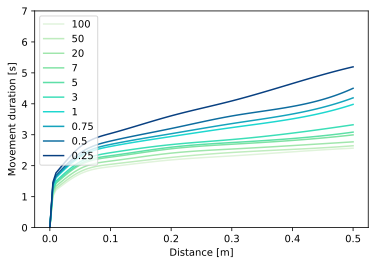

In [20]:
#%% Figure 1: distance / time 

f,ax = plt.subplots()
for v in range(0,len(loopValuation)):
#v = 0
  xtemp = loopdist.copy()
  y = duration.copy()
  y = y[v,:]
  y = y.T
  ytemp = np.concatenate(([0],y))
  
  xtemp = np.concatenate(([0],xtemp))
  yModel  = scipy.interpolate.splrep(xtemp,ytemp,s=0)#cubic spline
  xalot   = np.linspace(xtemp[0],xtemp[-1],100)
  yalot   = scipy.interpolate.splev(xalot,yModel)

  plt.plot(xalot,yalot,label=loopValuation[v],color = distcolors[v].get_hex())

plt.legend()
# %%
plt.xlabel("Distance [m]")
plt.ylabel("Movement duration [s]")
ax.set_ylim(0,7)


In [9]:
saveDict = {
  "tSol":duration,
  "maxspeed":peakhandspeed,
  "dists":distances}
import scipy
scipy.io.savemat('SimulationResults.mat', saveDict)


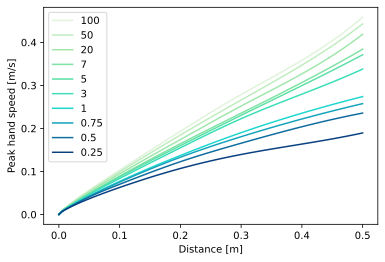

In [15]:
#%% Figure 2: distance peak speed / distance
import scipy.interpolate

f,ax = plt.subplots()
for v in range(0,len(loopValuation)):
#v = 0
  xtemp = loopdist.copy()
  y = peakhandspeed.copy()
  y = y[v,:]
  ytemp = np.concatenate(([0],y))

  xtemp   = np.concatenate(([0],xtemp))
  # interpolate to take off edges from this sweep. i think this is scientifically
  # a bit of a cornercut. but otherwise the simulations take a long time to run.
  yModel  = scipy.interpolate.splrep(xtemp,ytemp)#cubic spline
  xalot   = np.linspace(xtemp[0],xtemp[-1],100)
  yalot   = scipy.interpolate.splev(xalot,yModel)
  plt.plot(xalot,yalot, label=loopValuation[v],color = distcolors[v].get_hex())
  plt.xlabel("Distance [m]")
  plt.ylabel("Peak hand speed [m/s]")
  plt.legend()
# %%

Text(0.5, 0, 'Time [s]')

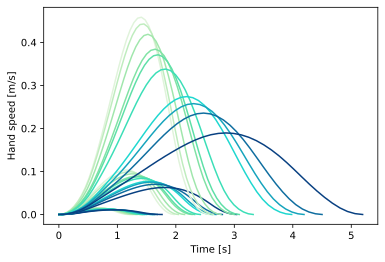

In [11]:
#%% Figure 3: 3 valuations, hand speed vs time
def plotBells(theList):
  for i in range(0,len(theList)):
    tempStruct = theList[i]  
    plt.plot(tempStruct.time,tempStruct.handspeed,distcolors[i].get_hex())

f,ax = plt.subplots()
plotBells(trajAll[1])
plotBells(trajAll[3])
plotBells(trajAll[-1])

plt.ylabel("Hand speed [m/s]")
plt.xlabel("Time [s]")


In [ ]:
# #%% Figure 4: COST plot. 
# f,ax = plt.subplots()
# v = np.where(loopValuation ==1)

# xtemp = loopdist.copy()
# xtemp = np.concatenate(([0],xtemp))

# y = workCost.copy()
# y = y[:,v]
# ytemp = np.concatenate(([0],y))
# y2 = frCost.copy()
# y2 = y2[:,v]
# y2temp = np.concatenate([0],y2)

# plt.plot(xtemp,ytemp, label=loopValuation[v],color = distcolors[v])
# plt.plot(xtemp,ytemp, label=loopValuation[v],color = distcolors[v])
# d
# plt.xlabel("Distance [m]")
# plt.ylabel("Peak hand speed [m/s]")
# plt.legend()
# # %%
